密度行列は量子力学の基本変数です。そして密度行列は$\rho^\dagger=\rho, \rm{tr} \rho =1$ および$\rho \succeq 0$を満たす必要があります。ただ、最後の$\rho \succeq 0$、つまり半正定値条件は行列の固有値が0以上というもので、取り扱いが面倒です。同値な条件はいくつか知られています。その一つに$\rho \succeq 0 \Leftrightarrow$ すべての主小行列式がゼロ以上、というのがあります(佐竹線形代数p.163 §4, 定理6 とその脚注参照)
これを使うと、密度行列の要素から有限個の不等式で書き下すことができます。

今回は3準位系の密度行列$\rho$に対する条件を、密度行列の要素の不等式で書き下す、ということをしてみます。ただ、無駄に面倒なので、雑に調べて終わりにしました。

三準位系では、$3\times 3$の密度行列になり、主小行列式は$2^3=8$個でてきます($n \times n$だと$2^n$個となります)。今後のことを考えると、減らしたいところです。ところで、半正定値条件でなく、正定値条件$\rho \succ 0$は、$\rho$のすべての主座小行列式がゼロと同値なので、3個、$n \times n$の密度行列でも$n$個の行列式を調べるだけでokです。これに還元してやるという手法を使えばよいです。

半正定値条件を正定値条件で書くには、$\rho$に単位行列×微小数の正定値条件を調べればokです。
もう少し丁寧に書くと$\rho$の半正定値条件は、$\rho\succeq 0 \Leftrightarrow\forall{}\varepsilon>0,\quad \rho+\varepsilon I \succ0$となります。よって、$\rho+\varepsilon I$の首座行列式たちを考えて、$\varepsilon$のべきでまとめ、各項を精査するという方針をとります。$I$は$n\times n$の単位行列です。

この証明は$\mathbb{R} \ni x, \varepsilon$ について$x\geq 0 \Leftrightarrow \forall{}\varepsilon>0, x+\varepsilon > 0$について考えてみるとすぐわかります。(なお対偶をとると、$\exists \varepsilon >0, x+\varepsilon \leq 0 \Leftrightarrow x < 0$なので、自明だと思います)

堀田量子本には、3準位系の密度行列$\rho$に対する条件は露わには書いてありませんでした。Phys. Lett. A 314, 339 (2003)を参照せよとあります。今回は、そのarXiv版であるhttps://arxiv.org/abs/quant-ph/0301152 を参照しつつ、見てゆきましょう。

この場合、式(3.15)は変更され、
$\hat{\lambda}_{n}^{\dagger}=\hat{\lambda}_{n}, \operatorname{Tr}\left[\hat{\lambda}_{n}\right]=0, \operatorname{Tr}\left[\hat{\lambda}_{n} \hat{\lambda}_{n^{\prime}}\right]=N \delta_{n n^{\prime}}$
から、
$\hat{\lambda}_{n}^{\dagger}=\hat{\lambda}_{n}, \operatorname{Tr}\left[\hat{\lambda}_{n}\right]=0, \operatorname{Tr}\left[\hat{\lambda}_{n} \hat{\lambda}_{n^{\prime}}\right]=2 \delta_{n n^{\prime}}$
と定数が変わります。
それに伴い、密度行列も
$\hat{\rho}=\frac{1}{N}\left(\hat{I}+\sum_{n=1}^{N^{2}-1}\left\langle\lambda_{n}\right\rangle \hat{\lambda}_{n}\right)$
から、
$\hat{\rho}=\frac{1}{N} \hat{I}+\frac{1}{2} \left ( \sum_{n=1}^{N^{2}-1}\left\langle\lambda_{n}\right\rangle \hat{\lambda}_{n} \right )$という式を使うように変更します。これは単なる規格化係数を変更するだけで、物理は何も変わりません。念のため。

In [1]:
from sympy import *

In [2]:
var('λ1:18', real=True)

(λ1, λ2, λ3, λ4, λ5, λ6, λ7, λ8, λ9, λ10, λ11, λ12, λ13, λ14, λ15, λ16, λ17)

In [3]:
e=Symbol('epsilon', real=True)

Gell-Mann行列を入力します。文献に従い、正規化の定数は$2$とします。$\hat \lambda_8$には、$\frac{1}{\sqrt{3}}$という定数がかかります。

In [4]:
_λ1=Matrix([[0,1,0],[1,0,0],[0,0,0]])
_λ2=Matrix([[0,-I,0],[I,0,0],[0,0,0]])
_λ3=Matrix([[1,0,0],[0,-1,0],[0,0,0]])
_λ4=Matrix([[0,0,1],[0,0,0],[1,0,0]])
_λ5=Matrix([[0,0,-I],[0,0,0],[I,0,0]])
_λ6=Matrix([[0,0,0],[0,0,1],[0,1,0]])
_λ7=Matrix([[0,0,0],[0,0,-I],[0,I,0]])
_λ8=1/sqrt(3)*Matrix([[1,0,0],[0,1,0],[0,0,-2]])
_λ8

Matrix([
[sqrt(3)/3,         0,            0],
[        0, sqrt(3)/3,            0],
[        0,         0, -2*sqrt(3)/3]])

In [5]:
(_λ8*_λ8).trace()

2

密度行列$\rho = \frac{1}{3}\hat I + \frac{1}{2}(\hat \lambda_1 \lambda_1+ \hat \lambda_2 \lambda_2 + \hat \lambda_3 \lambda_3+ \hat \lambda_4 \lambda4 + \hat \lambda_5 \lambda_5+ \hat \lambda_6 \lambda_6+ \hat \lambda_7 \lambda_7+ \hat \lambda_8 \lambda_8)$ を代入します

In [6]:
ρ3= Rational(1,3)*eye(3) + Rational(1,2)*(_λ1*λ1 + _λ2*λ2 + _λ3*λ3 + _λ4*λ4 + _λ5*λ5 + _λ6*λ6 + _λ7*λ7 + _λ8*λ8)
ρ3

Matrix([
[λ3/2 + sqrt(3)*λ8/6 + 1/3,              λ1/2 - I*λ2/2,       λ4/2 - I*λ5/2],
[            λ1/2 + I*λ2/2, -λ3/2 + sqrt(3)*λ8/6 + 1/3,       λ6/2 - I*λ7/2],
[            λ4/2 + I*λ5/2,              λ6/2 + I*λ7/2, -sqrt(3)*λ8/3 + 1/3]])

In [7]:
ρ3.trace()

1

まずは、手始めに$\rho$の行列式を求めてみましょう。

In [8]:
ρ3.det()*54*4
ρ3_det=ρ3.det()*54*4
ρ3_det

18*sqrt(3)*λ1**2*λ8 - 18*λ1**2 + 54*λ1*λ4*λ6 + 54*λ1*λ5*λ7 + 18*sqrt(3)*λ2**2*λ8 - 18*λ2**2 - 54*λ2*λ4*λ7 + 54*λ2*λ5*λ6 + 18*sqrt(3)*λ3**2*λ8 - 18*λ3**2 + 27*λ3*λ4**2 + 27*λ3*λ5**2 - 27*λ3*λ6**2 - 27*λ3*λ7**2 - 9*sqrt(3)*λ4**2*λ8 - 18*λ4**2 - 9*sqrt(3)*λ5**2*λ8 - 18*λ5**2 - 9*sqrt(3)*λ6**2*λ8 - 18*λ6**2 - 9*sqrt(3)*λ7**2*λ8 - 18*λ7**2 - 6*sqrt(3)*λ8**3 - 18*λ8**2 + 8

上式はゼロ以上です(必要ないですが、216を掛けました。比較しやすくするためです)。以下に、文献の(31)式を引用しました。

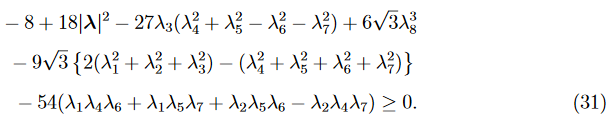

これらを比較すると、(i) 式全体の符号が違います。(ii) $-9 \sqrt{3}\left\{2\left(\lambda_{1}^{2}+\lambda_{2}^{2}+\lambda_{3}^{2}\right)-\left(\lambda_{4}^{2}+\lambda_{5}^{2}+\lambda_{6}^{2}+\lambda_{7}^{2}\right)\right \}$ ではなく、$-9 \sqrt{3}\left\{2\left(\lambda_{1}^{2}+\lambda_{2}^{2}+\lambda_{3}^{2}\right)-\lambda_8\left(\lambda_{4}^{2}+\lambda_{5}^{2}+\lambda_{6}^{2}+\lambda_{7}^{2}\right)\right\}$と$\lambda_8$が入ってきてます。おそらく論文のミスでしょう。

論文では条件式がこれで終わってます。我々の場合はこれだと不十分で、主行列式を調べつくす必要があります。おそらく、独立な不等式ではなく、徒労に終わると思われますが、調べる必要はあります。まずは、$\rho + \varepsilon I$を求めてみます。

In [9]:
ρ3_e= Rational(1,3)*eye(3) + Rational(1,2)*(_λ1*λ1 + _λ2*λ2 + _λ3*λ3 + _λ4*λ4 + _λ5*λ5 + _λ6*λ6 + _λ7*λ7 + _λ8*λ8) + eye(3)*e
ρ3_e

Matrix([
[epsilon + λ3/2 + sqrt(3)*λ8/6 + 1/3,                       λ1/2 - I*λ2/2,                λ4/2 - I*λ5/2],
[                      λ1/2 + I*λ2/2, epsilon - λ3/2 + sqrt(3)*λ8/6 + 1/3,                λ6/2 - I*λ7/2],
[                      λ4/2 + I*λ5/2,                       λ6/2 + I*λ7/2, epsilon - sqrt(3)*λ8/3 + 1/3]])

見やすくするために、216をかけてみました。

In [10]:
collect(ρ3_e.det()*54*4,e)

216*epsilon**3 + 216*epsilon**2 + epsilon*(-54*λ1**2 - 54*λ2**2 - 54*λ3**2 - 54*λ4**2 - 54*λ5**2 - 54*λ6**2 - 54*λ7**2 - 54*λ8**2 + 72) + 18*sqrt(3)*λ1**2*λ8 - 18*λ1**2 + 54*λ1*λ4*λ6 + 54*λ1*λ5*λ7 + 18*sqrt(3)*λ2**2*λ8 - 18*λ2**2 - 54*λ2*λ4*λ7 + 54*λ2*λ5*λ6 + 18*sqrt(3)*λ3**2*λ8 - 18*λ3**2 + 27*λ3*λ4**2 + 27*λ3*λ5**2 - 27*λ3*λ6**2 - 27*λ3*λ7**2 - 9*sqrt(3)*λ4**2*λ8 - 18*λ4**2 - 9*sqrt(3)*λ5**2*λ8 - 18*λ5**2 - 9*sqrt(3)*λ6**2*λ8 - 18*λ6**2 - 9*sqrt(3)*λ7**2*λ8 - 18*λ7**2 - 6*sqrt(3)*λ8**3 - 18*λ8**2 + 8

[8]のセルで求めた式がゼロならば、$\left(- λ_{1}^{2} - λ_{2}^{2} - λ_{3}^{2} - λ_{4}^{2} - λ_{5}^{2} - λ_{6}^{2} - λ_{7}^{2} - λ_{8}^{2} + \frac{4}{3}\right) > 0$ である必要があります。ただこれは独立ではなさそうです。この式を見やすくすると、
$ λ_{1}^{2} + λ_{2}^{2} + λ_{3}^{2} + λ_{4}^{2} + λ_{5}^{2} + λ_{6}^{2} + λ_{7}^{2} + λ_{8}^{2} < \frac{4}{3}$となり、半径$\frac{2}{\sqrt{3}}$の球の中にあると見れます。これはブロッホ球の拡張のような式です。

In [11]:
ρ3_2=ρ3
ρ3_2.col_del(2)
ρ3_2.row_del(2)
ρ3_2

Matrix([
[λ3/2 + sqrt(3)*λ8/6 + 1/3,              λ1/2 - I*λ2/2],
[            λ1/2 + I*λ2/2, -λ3/2 + sqrt(3)*λ8/6 + 1/3]])

In [12]:
ρ3_2_e = ρ3_2 + eye(2)*e

In [13]:
ρ3_2_e.det()

epsilon**2 + sqrt(3)*epsilon*λ8/3 + 2*epsilon/3 - λ1**2/4 - λ2**2/4 - λ3**2/4 + λ8**2/12 + sqrt(3)*λ8/9 + 1/9

In [14]:
collect(ρ3_2_e.det()*4*9,e)

36*epsilon**2 + epsilon*(12*sqrt(3)*λ8 + 24) - 9*λ1**2 - 9*λ2**2 - 9*λ3**2 + 3*λ8**2 + 4*sqrt(3)*λ8 + 4

上の式ですべての$\varepsilon$で成立させるには、$-9 \lambda_{1}^{2}-9 \lambda_{2}^{2}-9 \lambda_{3}^{2}+3 \lambda_{8}^{2}+4 \sqrt{3} \lambda_{8}+4 > 0$が必要、または$-9 \lambda_{1}^{2}-9 \lambda_{2}^{2}-9 \lambda_{3}^{2}+3 \lambda_{8}^{2}+4 \sqrt{3} \lambda_{8}+4 =0$のときは、$12\sqrt{3}\lambda_8 + 24 >0$が必要となります。

これらが独立であるかは簡単にはわかりません。実際、一番初めに求めた式の$\lambda_4, \lambda_5, \lambda_6, \lambda_7$に$0$を代入してみると、

In [15]:
ρ3_det.subs(λ4,0).subs(λ5,0).subs(λ6,0).subs(λ7,0)/2

9*sqrt(3)*λ1**2*λ8 - 9*λ1**2 + 9*sqrt(3)*λ2**2*λ8 - 9*λ2**2 + 9*sqrt(3)*λ3**2*λ8 - 9*λ3**2 - 3*sqrt(3)*λ8**3 - 9*λ8**2 + 4

となり、かなり似た式が出てきて、多分独立ではなさそうな雰囲気ですが、確固としたことは言えません。

最後の首座行列式は一つの不等式です。

In [16]:
ρ3_2
ρ3_2.col_del(1)
ρ3_2.row_del(1)
ρ3_2

Matrix([[λ3/2 + sqrt(3)*λ8/6 + 1/3]])

In [17]:
ρ3_2.det()

λ3/2 + sqrt(3)*λ8/6 + 1/3

これも0以上である必要があります。ただ、これも、独立ではなさそうな気がしますが、わかりません。

これは学術論文ではないので、とりあえず簡単にここまでにしておきます。いずれにせよ、わかるのは、2準位系のときの単なる球ではなく、3準位系での密度行列が満たすべき条件、特に半正定値条件は複雑な$\lambda$たちの多項式の不等式になるということです。さらに、求めた不等式たちは正しいのですが、独立かどうかはわからないということです。おそらく独立ではないと思います。いずれにせよ、どの不等式も満たす必要はありますし、満たした暁にはその密度行列は、3準位系の密度行列であるということではあります。